# OCR을 배워보자! 

#### 실습목표


- OCR의 과정을 이해합니다.

- 문자인식 결과의 표현방식을 이해합니다.

- 파이썬을 통해 OCR을 사용할 수 있습니다.


## STEP 1) 구글의 파이썬 API 인터페이스 모듈을 아래와 설치합니다.

클라우드 환경에는 이미 설치가 되어있으니 확인하고 넘어갑시다..

**$ pip install --upgrade google-api-python-client**

**$ pip install google-cloud-vision**

## STEP 2) Google Cloud Vision API 사용


아래 링크의 설명을 참고하여 서비스 계정 및 인증키를 생성합니다.

브라우저에서 다운로드한 인증키는 my_google_api_key.json이라는 파일명으로 변경합시다. (파일은 프로젝트 이름으로 시작하는 파일명으로 자동 저장됩니다.)

## TEP 3) API 사용 테스트

API를 활용하는 코드는 아래와 같습니다. 사용할 이미지를 cloud jupyter 를 이용하여 업로드 후 경로를 지정해 주세요


In [7]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [8]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/crypto-trail-321801-4bb185ec40c6.json'

-rw-r--r-- 1 root root 2324 Feb 24 14:58 /aiffel/aiffel/ocr_python/crypto-trail-321801-4bb185ec40c6.json


In [14]:
# 입력 이미지 경로를 지정해 주세요.
# path = os.getenv('HOME')+'/aiffel/ocr_python/test_imag.jpeg'


path = path = os.getenv('HOME')+'/aiffel/ocr_python/1.jpeg'
# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(path)

Texts:

"ALPA
НОTEL
The
"

"ALPA"

"НОTEL"

"The"
bounds: (57,61),(66,61),(66,67),(57,67)


먼저 입력받은 사진 속에서 문자의 위치를 찾아냅니다.이 과정을 Text Detection(문자검출)이라고 합니다.

찾은 문자영역으로 부터 문자를 읽어내는 것은 Text Recognition(문자인식)이라고 합니다.

아래 카카오의 OCR 모델은 먼저 문자가 있는 영역의 정보 (coord, Text Recognition)를 찾아내고, 각 영역에서 문자를 인식하고 있습니다. 이렇게 문자 인식 모델은 Text Detection과 Recognition 두 과정을 통해서 사진 속의 문자를 읽을 수 있게 됩니다.


딥러닝 기반 객체 검출 방법에는 Regression(회귀) 방식이나 Segmentation(세그멘테이션) 방식이 있습니다. 

**Regression**은 기준으로 하는 박스 대비 문자의 박스가 얼마나 차이가 나는지를 학습합니다.

**Segmentation**은 픽셀 단위로 해당 픽셀이 문자를 표현하는지를 분류하는 문제(pixel-wise classification)라고 볼 수 있습니다.

객체 검출과 세그멘테이션에 대한 자세한 방법은 다른 강의에서 배우도록 합시다. 여기서는 문자를 찾아내는 딥러닝 모델이 우리가 흔히 들어본 Object Detection과 큰 차이가 없다는 것만 알아두셔도 됩니다.

In [15]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


만들어둔 파이프라인의 recognize() 에 이미지를 몇 개 넣어줍니다.

이미지 소스의 url을 사용할 건데요. 이미지는 https://unsplash.com/s/photos/text 에서 가져왔습니다.



In [26]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
os.getenv('HOME')+'/aiffel/ocr_python/1.jpeg',
os.getenv('HOME')+'/aiffel/ocr_python/2.jpeg',
os.getenv('HOME')+'/aiffel/ocr_python/3.jpeg',
os.getenv('HOME')+'/aiffel/ocr_python/4.jpeg',
os.getenv('HOME')+'/aiffel/ocr_python/5.jpeg',
os.getenv('HOME')+'/aiffel/ocr_python/6.jpeg',
]



In [27]:
for index,path in enumerate(image_urls):
    print(" ")
    print("[{}] : {}".format(index, path))
    print("=============================================")
    detect_text(path)

 
[0] : /aiffel/aiffel/ocr_python/1.jpeg
Texts:

"ALPA
НОTEL
The
"

"ALPA"

"НОTEL"

"The"
bounds: (57,61),(66,61),(66,67),(57,67)
 
[1] : /aiffel/aiffel/ocr_python/2.jpeg
Texts:

"A CONGRATTU
AE ASST THEN
WSo0s IN ASSEH
ASIA'S LARGEST
NASDAQ 100 ETT
MIRAE ASSET
TIGERETF
PIEC
Nasdag
PRME O
"

"A"

"CONGRATTU"

"AE"

"ASST"

"THEN"

"WSo0s"

"IN"

"ASSEH"

"ASIA'S"

"LARGEST"

"NASDAQ"

"100"

"ETT"

"MIRAE"

"ASSET"

"TIGERETF"

"PIEC"

"Nasdag"

"PRME"

"O"
bounds: (210,160),(223,160),(223,165),(210,165)
 
[2] : /aiffel/aiffel/ocr_python/3.jpeg
Texts:

"BUBBA
GUMP
SHRIME
COMPANY
BUBBA GIMP
RESTAURANT
MARKET
EMATS
"

"BUBBA"

"GUMP"

"SHRIME"

"COMPANY"

"BUBBA"

"GIMP"

"RESTAURANT"

"MARKET"

"EMATS"
bounds: (124,238),(138,238),(138,243),(124,243)
 
[3] : /aiffel/aiffel/ocr_python/4.jpeg
Texts:

"McDonald's
OVER B9 BILLION SERVED
NEWSIS
"

"McDonald's"

"OVER"

"B9"

"BILLION"

"SERVED"

"NEWSIS"
bounds: (210,164),(269,164),(269,176),(210,176)
 
[4] : /aiffel/aiffel/ocr_python/5.jpeg

In [28]:
images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

In [42]:
prediction_groups

[[[('dh',
    array([[112.,  35.],
           [135.,  35.],
           [135.,  53.],
           [112.,  53.]], dtype=float32)),
   ('alpa',
    array([[ 70.10066 ,  51.133682],
           [190.24123 ,  52.359604],
           [189.92693 ,  83.16252 ],
           [ 69.78636 ,  81.9366  ]], dtype=float32)),
   ('hotel',
    array([[ 67.,  81.],
           [160.,  81.],
           [160., 100.],
           [ 67., 100.]], dtype=float32))]],
 [[('aocongran',
    array([[115.,  25.],
           [163.,  25.],
           [163.,  33.],
           [115.,  33.]], dtype=float32)),
   ('asoe',
    array([[121.,  42.],
           [144.,  42.],
           [144.,  49.],
           [121.,  49.]], dtype=float32)),
   ('neen',
    array([[145.28049 ,  41.475613],
           [172.71951 ,  44.524395],
           [171.91464 ,  51.7683  ],
           [144.47562 ,  48.719517]], dtype=float32)),
   ('se',
    array([[18., 57.],
           [32., 57.],
           [32., 65.],
           [18., 65.]], dtype=float32))

이제 인식된 결과를 pyplot으로 시각화를 해봅니다.

사용이 매우 간단합니다! 내부적으로 recognize() 는 검출기와 인식기를 두고, 검출기로 바운딩 박스(bounding box, 문자가 있는 영역을 표시한 정보)를 검출한 뒤, 인식기가 각 박스로부터 문자를 인식하는 과정을 거치도록 합니다.

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


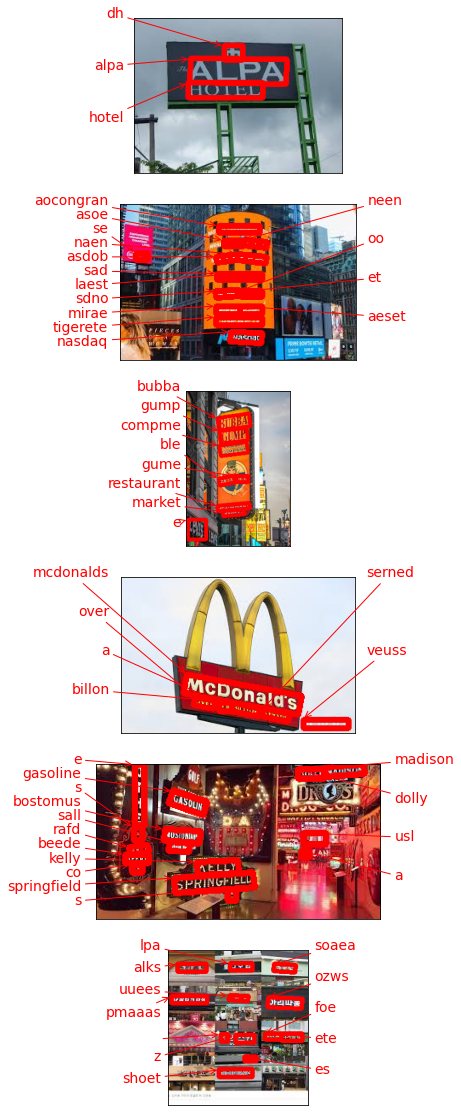

In [29]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

이제 인식된 결과를 pyplot으로 시각화를 해봅니다.

사용이 매우 간단합니다! 내부적으로 recognize() 는 검출기와 인식기를 두고, 검출기로 바운딩 박스(bounding box, 문자가 있는 영역을 표시한 정보)를 검출한 뒤, 인식기가 각 박스로부터 문자를 인식하는 과정을 거치도록 합니다.

# 테서랙트(Tesseract OCR) 써보기!

이번에는 테서랙트(Tesseract) 라이브러리로 이미지에서 문자를 인식해 보겠습니다. 

테서랙트는 구글에서 후원하는 OCR 오픈소스 라이브러리로 현재는 버전 4와 Tesseract.js등으로 확장되는 등 많은 곳에서 사용되고 있습니다.

버전 4에서는 LSTM이 엔진에 추가되었고 현재 한국어를 포함한 116 개 국어를 지원하고 있습니다.

오픈소스라는 점은 여러분들이 원하는 프로젝트에 활용하기 쉽다는 것을 뜻하니, 직접 해 보면서 익혀두면 나중에 간단한 OCR 모델이 필요할 때 빠르게 활용할 수 있을 겁니다.

### 1) 테서랙트 설치하기

- $ sudo apt install tesseract-ocr

- $ sudo apt install libtesseract-dev


### 2) 테서랙트 파이썬 wrapper 설치하기

Pytesseract는 OS에 설치된 테서랙트를 파이썬에서 쉽게 사용할 수 있도록 해주는 래퍼 라이브러리(wrapper library)입니다. 파이썬 내에서 컴퓨터에 설치된 테서랙트 엔진의 기능을 바로 쓸 수 있도록 해줍니다.



### 3) 테서랙트로 문자 검출하고 이미지 자르기 (detection)

테서랙트를 사용하면 한 번에 이미지 내의 문자 검출과 인식을 할 수 있는데요. 우리는 OCR이 이뤄지는 전체 과정을 직접 거쳐보기 위해 검출을 먼저 해 봅시다.



In [35]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/2.jpeg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png


### 4) 테서랙트로 잘린 이미지에서 단어 인식하기

이제 문자 인식을 해 볼 차례입니다.

검출된 바운딩 박스 별로 잘린 이미지를 넣어주면 영역별 텍스트가 결괏값으로 나오는 image_to_string()를 사용하게 됩니다.

이렇게 인식된 결과가 실제 이미지와 맞는지 확인해 봅시다.



In [36]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)


5 ae a

gu Oe,

hh ean Bh:

wey ete ae

ai cl i ee

p NET Te


:

Done


#  프로젝트 : 다양한 OCR모델 비교하기

## Step1. 검증용 데이터셋 준비

In [37]:
import os

In [38]:
img_dir = os.getenv('HOME')+'/aiffel/ocr_python'
signs = os.listdir(img_dir)
signs

['0007.png',
 '0003.png',
 '0004.png',
 '3.jpeg',
 '0005.png',
 '5.jpeg',
 '0008.png',
 '2.jpeg',
 '0006.png',
 '6.jpeg',
 'crypto-trail-321801-4bb185ec40c6.json',
 '1.jpeg',
 '0002.png',
 '4.jpeg',
 'crypto-trail-321801-dee21211a24c.json',
 '0001.png',
 '.ipynb_checkpoints',
 '0000.png']

## Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행


## 1. keras-ocr

In [49]:
import matplotlib.pyplot as plt
import keras_ocr

In [47]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
# 인식을 위한 파이프라인을 생성하는데 이때 초기화 과정에서 미리 학습된 모델의 가중치(weight)를 불러온다.
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [54]:
images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

In [55]:
prediction_groups

[[[('dh',
    array([[112.,  35.],
           [135.,  35.],
           [135.,  53.],
           [112.,  53.]], dtype=float32)),
   ('alpa',
    array([[ 70.10066 ,  51.133682],
           [190.24123 ,  52.359604],
           [189.92693 ,  83.16252 ],
           [ 69.78636 ,  81.9366  ]], dtype=float32)),
   ('hotel',
    array([[ 67.,  81.],
           [160.,  81.],
           [160., 100.],
           [ 67., 100.]], dtype=float32))]],
 [[('aocongran',
    array([[115.,  25.],
           [163.,  25.],
           [163.,  33.],
           [115.,  33.]], dtype=float32)),
   ('asoe',
    array([[121.,  42.],
           [144.,  42.],
           [144.,  49.],
           [121.,  49.]], dtype=float32)),
   ('neen',
    array([[145.28049 ,  41.475613],
           [172.71951 ,  44.524395],
           [171.91464 ,  51.7683  ],
           [144.47562 ,  48.719517]], dtype=float32)),
   ('se',
    array([[18., 57.],
           [32., 57.],
           [32., 65.],
           [18., 65.]], dtype=float32))

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


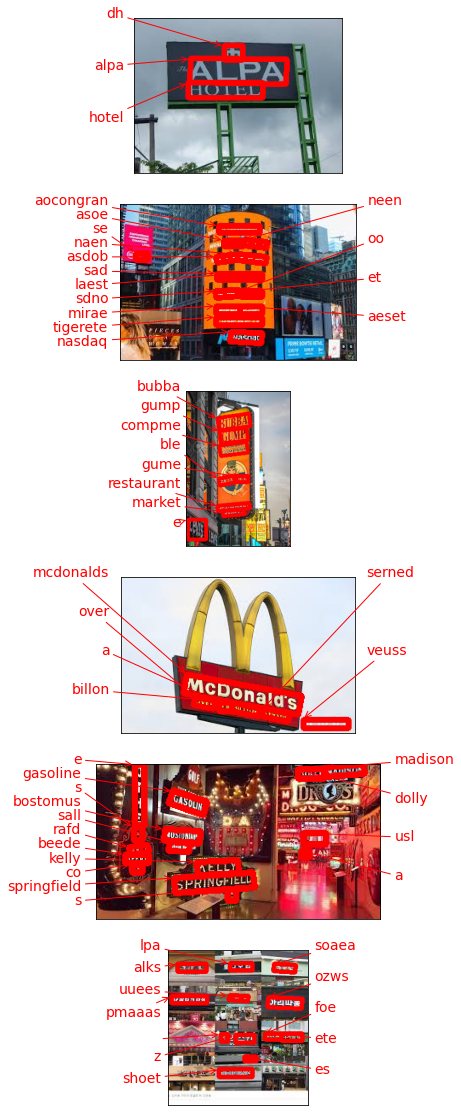

In [56]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## 2. tesseract OCR


In [60]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt
import re

In [79]:
p = re.compile("photo\d")

def crop_word_regions(image_path=os.getenv('HOME')+'/aiffel/ocr_python', output_path='./output', path_name = 'photo1'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{path_name}" + "_" +f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python/tesseract_images'
cropped_image_path_list = []
for img_path in image_urls:
    cropped_image_path_list.append(crop_word_regions(img_path, work_dir, p.findall(img_path)))

/aiffel/aiffel/ocr_python/tesseract_images/[]_0000.png
/aiffel/aiffel/ocr_python/tesseract_images/[]_0000.png
/aiffel/aiffel/ocr_python/tesseract_images/[]_0001.png
/aiffel/aiffel/ocr_python/tesseract_images/[]_0002.png
/aiffel/aiffel/ocr_python/tesseract_images/[]_0003.png
/aiffel/aiffel/ocr_python/tesseract_images/[]_0004.png
/aiffel/aiffel/ocr_python/tesseract_images/[]_0005.png
/aiffel/aiffel/ocr_python/tesseract_images/[]_0006.png
/aiffel/aiffel/ocr_python/tesseract_images/[]_0007.png
/aiffel/aiffel/ocr_python/tesseract_images/[]_0008.png
/aiffel/aiffel/ocr_python/tesseract_images/[]_0000.png


SystemError: tile cannot extend outside image

In [80]:
cropped_image_path_list = []
tee_images = list(os.listdir(os.getenv('HOME')+'/aiffel/ocr_python'))

del tee_images[8]

for tee_img in tee_images:
    cropped_image_path_list.append(str(work_dir) +  '/' + tee_img)


len(cropped_image_path_list)

19

In [81]:
save_dir = os.getenv('HOME')+'/aiffel/ocr_python/'

for sign in signs:
    print(f'[{sign}]')
    try:
        recognize_images(os.path.join(img_dir, sign), save_dir)
    except:
        print(f'Cannot recognize characters from {sign}')

[0007.png]

Done
[0003.png]
hh ean Bh:

Done
[0004.png]
wll:

Faas

md

Done
[3.jpeg]
Cannot recognize characters from 3.jpeg
[0005.png]
IGERETF

Done
[5.jpeg]
iE cal oes

Done
[0008.png]
:

Done
[2.jpeg]

5 ae a

gu Oe,

hh ean Bh:

wey ete ae

ai cl i ee

p NET Te


:

Done
[0006.png]
p NET Te

eee

=it

Done
[6.jpeg]
: , as

Done
[crypto-trail-321801-4bb185ec40c6.json]
Cannot recognize characters from crypto-trail-321801-4bb185ec40c6.json
[1.jpeg]

Done
[0002.png]
=it

Done
[4.jpeg]
fy)

Done
[crypto-trail-321801-dee21211a24c.json]
Cannot recognize characters from crypto-trail-321801-dee21211a24c.json
[0001.png]
eee

Done
[.ipynb_checkpoints]
Cannot recognize characters from .ipynb_checkpoints
[0000.png]
eee

Done


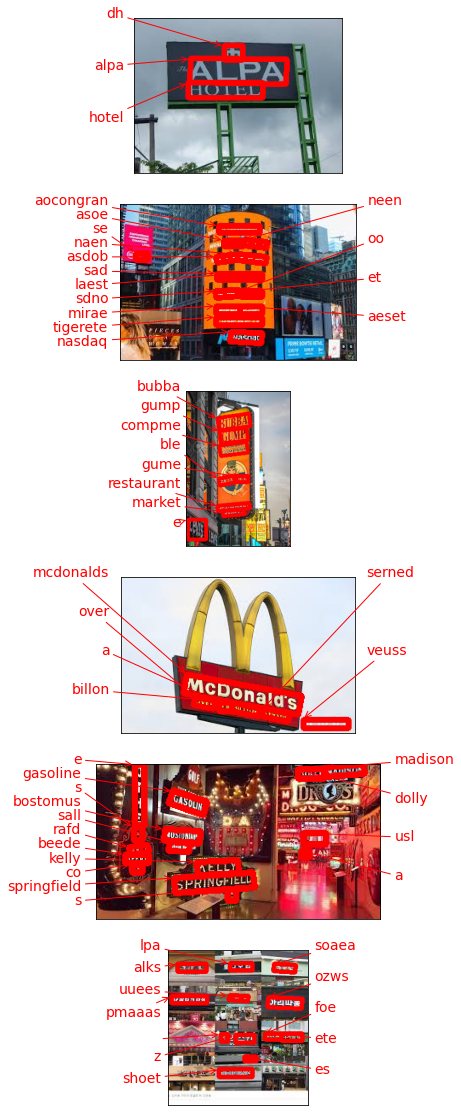

In [87]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## 3. 구글 OCR

In [94]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))
       vertices = (['({},{})'.format(vertex.x, vertex.y)
       for vertex in text.bounding_poly.vertices])
       print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [99]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/crypto-trail-321801-4bb185ec40c6.json'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
for file in signs:
    print(f'[{file}]')
    detect_text(os.path.join(img_dir, file))  

    print('the end')

[0007.png]
Texts:
the end
[0003.png]
Texts:

"WSODB IN ASSES
"
bounds: (6,0),(61,0),(61,7),(6,7)

"WSODB"
bounds: (6,0),(29,0),(29,7),(6,7)

"IN"
bounds: (32,0),(37,0),(37,4),(32,4)

"ASSES"
bounds: (41,0),(61,0),(61,7),(41,7)
the end
[0004.png]
Texts:

"MIRAE ARSET
"
bounds: (1,5),(49,5),(49,12),(1,12)

"MIRAE"
bounds: (1,5),(26,5),(26,12),(1,12)

"ARSET"
bounds: (29,5),(49,5),(49,12),(29,12)
the end
[3.jpeg]
Texts:

"BUBBA
GUMP
SHRIME
COMPANY
BUBBA GIMP
RESTAURANT
MARKET
EMATS
"
bounds: (52,41),(138,41),(138,243),(52,243)

"BUBBA"
bounds: (53,52),(109,41),(113,60),(57,71)

"GUMP"
bounds: (57,72),(103,65),(107,86),(60,94)

"SHRIME"
bounds: (66,98),(100,93),(100,98),(67,103)

"COMPANY"
bounds: (58,105),(107,98),(109,108),(59,115)

"BUBBA"
bounds: (59,154),(86,150),(87,161),(60,165)

"GIMP"
bounds: (88,150),(106,148),(107,160),(90,162)

"RESTAURANT"
bounds: (52,202),(109,198),(110,207),(53,211)

"MARKET"
bounds: (66,214),(100,211),(100,216),(66,219)

"EMATS"
bounds: (124,238),(138,238),

Exception: Bad image data.
For more info on error messages, check: https://cloud.google.com/apis/design/errors

In [100]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))
       vertices = (['({},{})'.format(vertex.x, vertex.y)
       for vertex in text.bounding_poly.vertices])
       print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [101]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/crypto-trail-321801-4bb185ec40c6.json'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
for file in signs:
    print(f'[{file}]')
    detect_text(os.path.join(img_dir, file))  

    print('the end')

[0007.png]
Texts:
the end
[0003.png]
Texts:

"WSODB IN ASSES
"
bounds: (6,0),(61,0),(61,7),(6,7)

"WSODB"
bounds: (6,0),(29,0),(29,7),(6,7)

"IN"
bounds: (32,0),(37,0),(37,4),(32,4)

"ASSES"
bounds: (41,0),(61,0),(61,7),(41,7)
the end
[0004.png]
Texts:

"MIRAE ARSET
"
bounds: (1,5),(49,5),(49,12),(1,12)

"MIRAE"
bounds: (1,5),(26,5),(26,12),(1,12)

"ARSET"
bounds: (29,5),(49,5),(49,12),(29,12)
the end
[3.jpeg]
Texts:

"BUBBA
GUMP
SHRIME
COMPANY
BUBBA GIMP
RESTAURANT
MARKET
EMATS
"
bounds: (52,41),(138,41),(138,243),(52,243)

"BUBBA"
bounds: (53,52),(109,41),(113,60),(57,71)

"GUMP"
bounds: (57,72),(103,65),(107,86),(60,94)

"SHRIME"
bounds: (66,98),(100,93),(100,98),(67,103)

"COMPANY"
bounds: (58,105),(107,98),(109,108),(59,115)

"BUBBA"
bounds: (59,154),(86,150),(87,161),(60,165)

"GIMP"
bounds: (88,150),(106,148),(107,160),(90,162)

"RESTAURANT"
bounds: (52,202),(109,198),(110,207),(53,211)

"MARKET"
bounds: (66,214),(100,211),(100,216),(66,219)

"EMATS"
bounds: (124,238),(138,238),

Exception: Bad image data.
For more info on error messages, check: https://cloud.google.com/apis/design/errors

## 테스트 결과 정리

## Google-OCR

In [113]:
ocr_image = os.getenv('HOME')+'/aiffel/ocr_python/2.jpeg'

In [114]:
# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(ocr_image)

Texts:

"A CONGRATTU
AE ASST THEN
WSo0s IN ASSEH
ASIA'S LARGEST
NASDAQ 100 ETT
MIRAE ASSET
TIGERETF
PIEC
Nasdag
PRME O
"
bounds: (36,24),(223,24),(223,165),(36,165)

"A"
bounds: (117,27),(119,27),(120,35),(118,35)

"CONGRATTU"
bounds: (128,24),(161,25),(161,35),(128,34)

"AE"
bounds: (104,42),(119,42),(119,51),(104,51)

"ASST"
bounds: (121,42),(143,42),(143,51),(121,51)

"THEN"
bounds: (145,42),(161,42),(161,51),(145,51)

"WSo0s"
bounds: (107,60),(136,60),(136,67),(107,67)

"IN"
bounds: (139,60),(144,60),(144,65),(139,65)

"ASSEH"
bounds: (148,59),(168,59),(168,68),(148,68)

"ASIA'S"
bounds: (113,81),(132,81),(132,87),(113,87)

"LARGEST"
bounds: (136,81),(164,81),(164,86),(136,86)

"NASDAQ"
bounds: (112,101),(138,101),(138,107),(112,107)

"100"
bounds: (141,101),(152,101),(152,106),(141,106)

"ETT"
bounds: (155,101),(164,101),(164,107),(155,107)

"MIRAE"
bounds: (114,120),(138,120),(138,126),(114,126)

"ASSET"
bounds: (141,120),(164,120),(164,127),(141,127)

"TIGERETF"
bounds: (113,133

## Keras_ocr

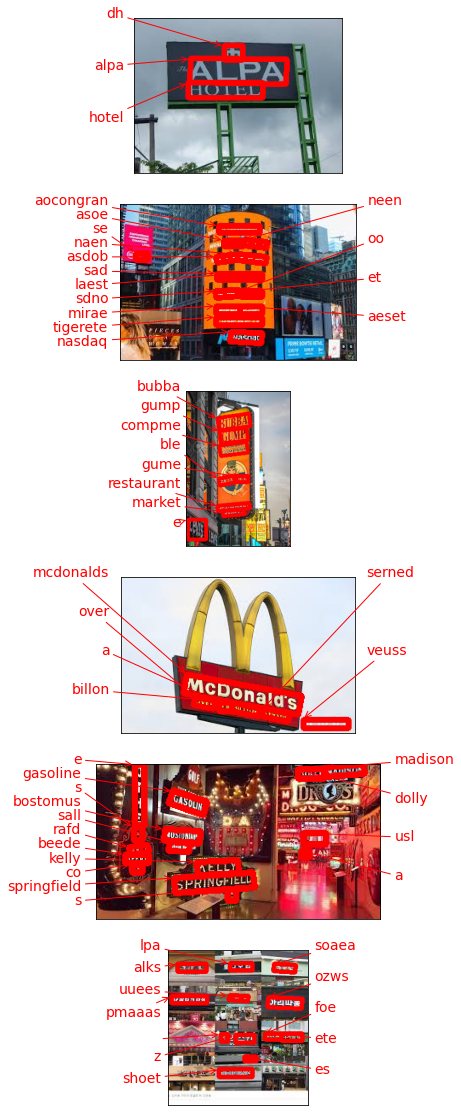

In [116]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## tesseract_ocr

In [118]:
save_dir = os.getenv('HOME')+'/aiffel/ocr_python/'

for sign in signs:
    print(f'[{sign}]')
    try:
        recognize_images(os.path.join(img_dir, sign), save_dir)
    except:
        print(f'Cannot recognize characters from {sign}')

[0007.png]
Cannot recognize characters from 0007.png
[0003.png]
Cannot recognize characters from 0003.png
[0004.png]
Cannot recognize characters from 0004.png
[3.jpeg]
Cannot recognize characters from 3.jpeg
[0005.png]
Cannot recognize characters from 0005.png
[5.jpeg]
Cannot recognize characters from 5.jpeg
[0008.png]
Cannot recognize characters from 0008.png
[2.jpeg]
Cannot recognize characters from 2.jpeg
[0006.png]
Cannot recognize characters from 0006.png
[6.jpeg]
Cannot recognize characters from 6.jpeg
[crypto-trail-321801-4bb185ec40c6.json]
Cannot recognize characters from crypto-trail-321801-4bb185ec40c6.json
[1.jpeg]
Cannot recognize characters from 1.jpeg
[0002.png]
Cannot recognize characters from 0002.png
[4.jpeg]
Cannot recognize characters from 4.jpeg
[crypto-trail-321801-dee21211a24c.json]
Cannot recognize characters from crypto-trail-321801-dee21211a24c.json
[0001.png]
Cannot recognize characters from 0001.png
[.ipynb_checkpoints]
Cannot recognize characters from .ipynb

# 회고

- 결제에러가 나서 무엇을해도 결제를 하지않으면 안됐었다.

    - 하지만 여러번의 구글링 끝에 하는방법을 알아냈고 무료평가판 이용창을 들어가 이용하기를 눌러야 가능하다는걸 알 수 있었다 .
    
    
- google_ocr은 너무작은 글자빼고는 잘 인식하여 검출했다.


- keras_ocr은 정말 작은글자까지도 잘 인식하여 검출해냈다.


- tesseract_ocr도 잘 검출 해냈지만, google_ocr이나 keras_ocr보단 잘 검출해내지 못했다.


- 각 API마다 글자 인식은 잘하는거 같다. 무슨사진이냐 아니면 무슨배경이고 글씨가 크냐 작냐에 따라 검출해내는 point가 다른거 같다.


- 사진넣고 검출 해내는거 볼떄마다 재미있어 계속 추가해서 잘 검출해내는지 보는 재미가 있었다.
